결정트리모델
- tree : 뒤집어진 나무 구조
- 관심대상이 되는 집단을몇 개의 소집단으로 분류(classification)하거나 예측(prediction)을수행할 수 있도록 해주는 분석방법
- 분석과정을 쉽게 이해하고 **설명할 수 있다**는 장점
- 이산형 자료 중심
- Class(클래스): 분류하고자 하는 개념들(종속변수)
- Attribute(속성): Class에 영향을 미친다고 알려진 개념들(독립변수)
- >모든 하위집합들의 클래스가 하나의 클래스에 속하도록 분류하는 것이 목표
  


- 위스콘신 유방암 데이터로 양성인지 악성인지 확인해보자 
- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 로드하기


In [74]:
# 위스콘신 유방암 데이터
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 데이터 탐색하기


In [75]:
df.info()

# y(target) 값인 diagnosis는 object(문자형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
df.isnull().sum()  # 데이터에 결측치 없음
# Unnamed는 불필요한 columns 이므로 신경쓰지 않는다  

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 데이터 전처리

- 'diagnosis'가 정답데이터로 사용

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

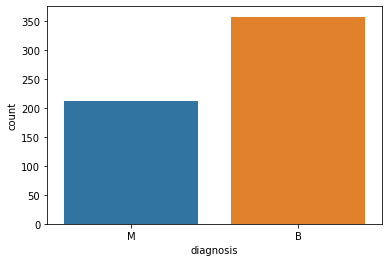

In [77]:
sns.countplot(x = df['diagnosis'])  

In [78]:
print(df['diagnosis'].unique())  # 특성값확인하기
print(df['diagnosis'].value_counts())  # 양성 212건, 음성 357건의 데이터

['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


In [79]:
## M은 1(악성), B는 0(양성)으로 변환하기

def func1(list):
    if 'M' in list:
        return 1
    else:
        return 0
    
    
df['class'] = df['diagnosis'].apply(func1)
df = df.drop(columns=['diagnosis'])
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,class
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


상관관계
상관계수 설명


In [80]:
# df.corr()['class']  # 'class'를 기준으로 상관관계 확인 => 수치형 데이터만 
df.corr()['class'].sort_values(ascending=False)

# 관련없는 데이터 제거를 위함 

class                      1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [81]:
# 필요없는 column 없애기 : drop 사용 

data = df.drop(columns=['fractal_dimension_se', 'id', 'symmetry_se', 'texture_se',
               'fractal_dimension_mean', 'smoothness_se', 'Unnamed: 32'])   # 7개의 column 삭제 
data.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### train/test dataset 분할

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# 특징데이터와 정답데이터 생성 : 지도학습은 정답데이터 반드시 필요 
X = data.drop(columns=['class'])
y = data['class']

In [84]:
# train, test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# 569개의 데이터 => 398 : 171로 나눔 
print(x_train.shape)
print(x_test.shape)


(398, 25)
(171, 25)


#### 결정 트리 모델 생성

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report #정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [86]:
model = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=1)
#model = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [87]:
# 학습
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### 시각화

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

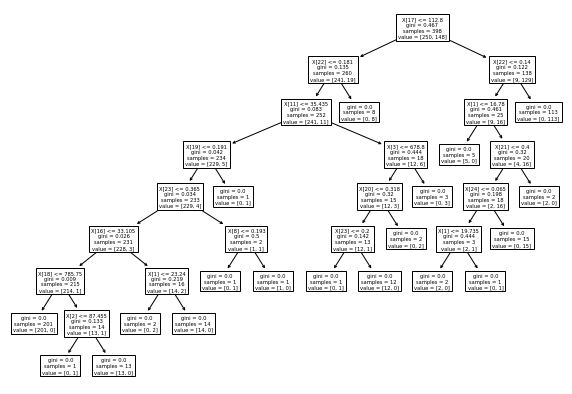

In [89]:
plt.figure(figsize=(10,7))
plot_tree(model)
plt.show()

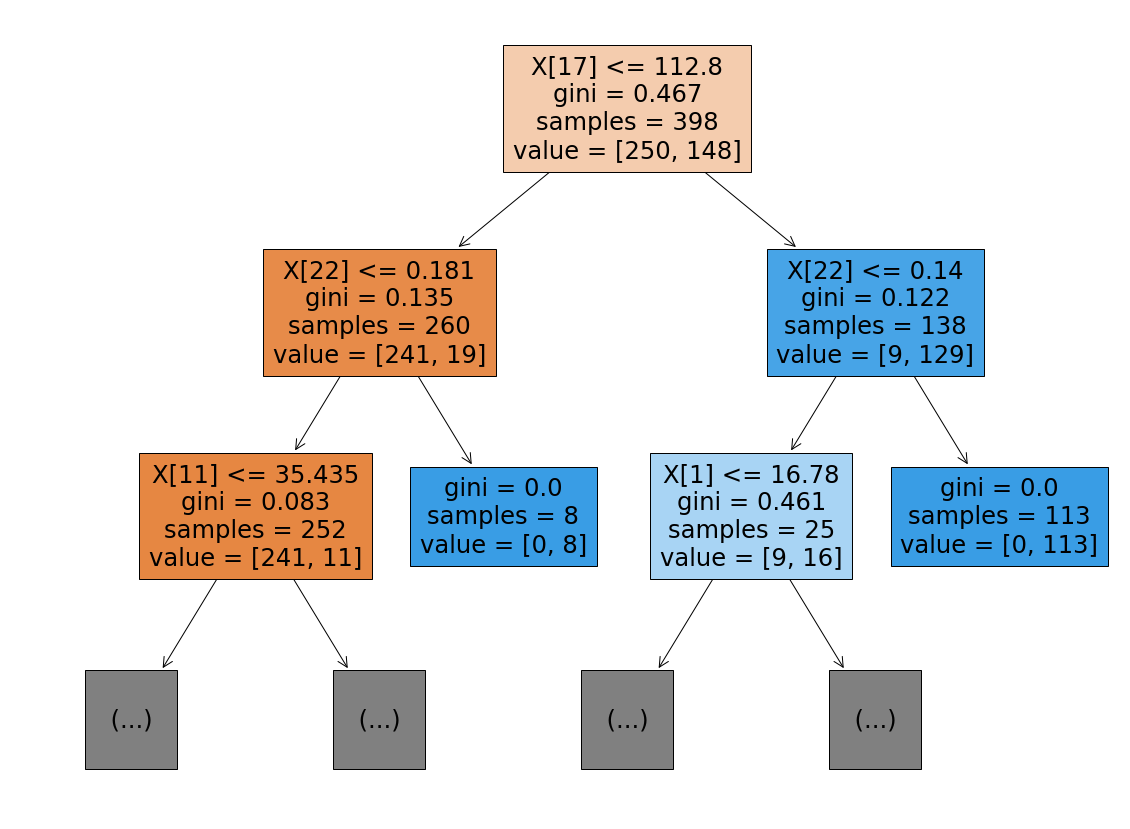

In [90]:
plt.figure(figsize=(20,15))
plot_tree(model, max_depth=2, filled=True)
plt.show()

In [91]:
# 예측
print(model.score(x_train, y_train))  # 정확도 100% ==> 과대적합 
model.score(x_test, y_test)

1.0


0.9005847953216374

Gini 계수, 엔트로피 설명 

### 일반화, 과대적합, 과소적합
-일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화(generaliztion) 되었다고 표현
- **일반화된 모델**을 만드는 것이 중요함
- > 과대적합 : 모델이 훈련(train)세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려운 문제
- > 과소적합 : 모델이 간단한 경우, 데이터의 면면과 다양성을 잡아내지 못해 훈련 세트에 잘 맞지 않는 문제 
- > 모델이 복잡할수록 훈련 데이터에 대한 정확한 예측이 가능하지만, 이에 따른 과대적합 문제가 발생한다 

### 과대적합(Overfitting)
- 가지치기 필수 : max_depth(트리의 최대 깊이)을 사전에 설정
- sklearn은 사전 가지치기만 다룸
- 트리모델의 가지치기 방법 

모든 리프 노드가 순수 노드가 될 때까지 트리 만들기를 진행하면모델이 매우 복잡해지고 훈련 데이터에 과대적합됨(accuracy=1.0)
- 과대적합 : 일반화된 모델이 아니므로 큰 문제 

> 사전 가지치기(pre-pruning) : sklearn은 사전 가지치기만 지원함
> - 트리 생성을 일찍 중단하는 전략
> - 트리의 최대 깊이 제한, 리프의 최대 개수 제한 



In [92]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
model.score(x_test, y_test)

0.9623115577889447


0.9181286549707602

### 트리모델 장단점 
- 과적합으로 알고리즘 성능 저하(트리의 크기를 사전에 제한하는 가지치기 필수)
- 한번에 하나의 변수만 고려(변수간 상호작용 파악 어려움)
- 약간의 차이에 따라 트리 모양이 많이 달라짐(두 변수가 비슷한 수준의 정보력, 약간의 차이로 다른 변수가 선택되면 이후의 트리 구성이 크게 달라짐)
- > 해결방법 : 랜덤포레스트(앙상블기법), 그러나 결국 랜덤포레스트는 결정트리모델로 구성되어있기 때문에 결정 트리모델에 대한 이론은 알고 있어야함

### 검증세트
- 기존 방법 : Train / Test =-> 결과 => 과대/과소적합 확인 => 더 나은 모델
- 문제점 : 모델 튜닝 시에 Test 데이터를 활용함
- > 새로운 방법 : Train/Valid/Test로 나누어 과대,과소적합을 확인하는 Valid dataset을 따로 마련

In [93]:
# train(8) : test(2)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
print(x_train.shape)

# train 데이터(8)를 => train(6) : valid(2) 로 분리
x_train, val_train, y_train, val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, val_train.shape)

(455, 25)
(364, 25) (91, 25)


In [94]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
model.score(val_train, val_test)


0.9835164835164835


0.9340659340659341

In [95]:
x_train.shape
x_test.shape

(114, 25)

### 교차검증 
- valid dataset 생성하느라 train 세트 크기가 줄어듦
- 좋은 모델을 위한 양질의 데이터가 필요함 
- Test는 그대로 두고 Train 세트를 분리하여 1개 set를 vaild로 사용
- 보통 5-fold, 10-fold 사용

In [96]:
# Image(url='https://images.velog.io/images/lsmmay322/post/fc345bf4-22e8-469e-b819-067771f17eb0/img.png', width=500)

In [97]:
from sklearn.model_selection import cross_validate


# sklearn은 주로 머신러닝에서 사용, 딥러닝에서는 직접 코드를 구현해야함
# 5-fold(default)

scores = cross_validate(model, X, y)
print(scores)




{'fit_time': array([0.00500154, 0.00400066, 0.00400114, 0.00422716, 0.00400114]), 'score_time': array([0.00100064, 0.0010004 , 0.00099993, 0.00077343, 0.00100017]), 'test_score': array([0.90350877, 0.89473684, 0.92105263, 0.93859649, 0.91150442])}


In [98]:
import numpy as np
print(np.mean(scores['test_score']))


0.9138798323241734


In [99]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(np.mean(score))


0.9138798323241734


주요 Parameter
- max_depth : 트리의 최대 깊이
- min_sample_split : 분할이 필요한 최소 샘플 개수
- min_samples_leaf : 리프 노드의 최소 샘플 개수
- max_leaf_nodes : 리프 노드의 최대 개수 
- max_features : 가장 좋은 분할을 위해 고려할 feature 개수 

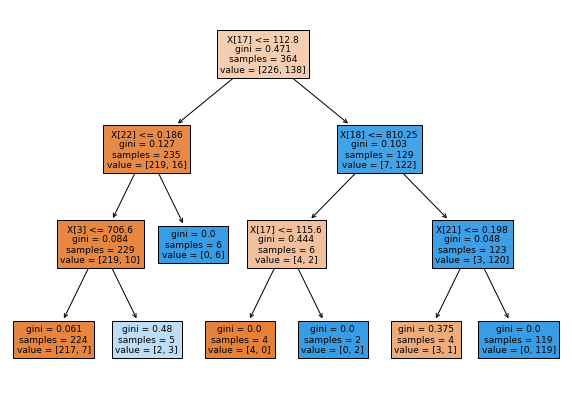

0.9230769230769231


In [112]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(x_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(tree, filled=True)
plt.show()
print(tree.score(val_train, val_test))


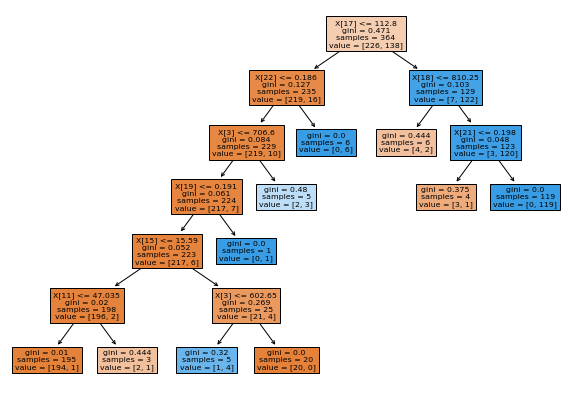

0.9340659340659341


In [109]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
tree.fit(x_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(tree, filled=True)
plt.show()

print(tree.score(val_train, val_test))


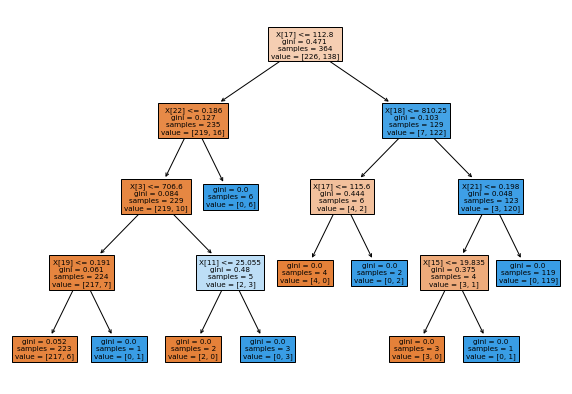

0.9230769230769231


In [111]:
tree = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=42)
tree.fit(x_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(tree, filled=True)
plt.show()

print(tree.score(val_train, val_test))


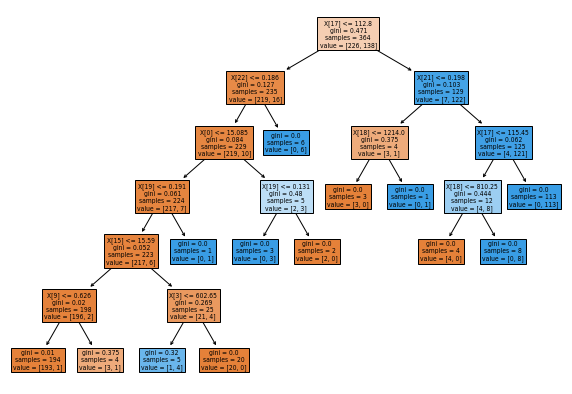

0.9340659340659341


In [110]:
#  80% 의 feature 만 고려하여 분할 알고리즘 적용

tree = DecisionTreeClassifier(max_depth=6, max_features=0.8, random_state=42)
tree.fit(x_train, y_train)
plt.figure(figsize=(10, 7))
plot_tree(tree, filled=True)
plt.show()

print(tree.score(val_train, val_test))


In [113]:
tree.feature_importances_


array([0.        , 0.        , 0.        , 0.02055968, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.85099156, 0.03066914, 0.        ,
       0.        , 0.02828885, 0.06949077, 0.        , 0.        ])

In [119]:
df = pd.DataFrame(list(zip(X.iloc[:], tree.feature_importances_)), columns=['feature', 'importance']).sort_values('importance', ascending=False)
df


,feature,importance
17,perimeter_worst,0.850992
22,concave points_worst,0.069491
18,area_worst,0.030669
21,concavity_worst,0.028289
3,area_mean,0.020560
0,radius_mean,0.000000
13,concavity_se,0.000000
23,symmetry_worst,0.000000
20,compactness_worst,0.000000
19,smoothness_worst,0.000000


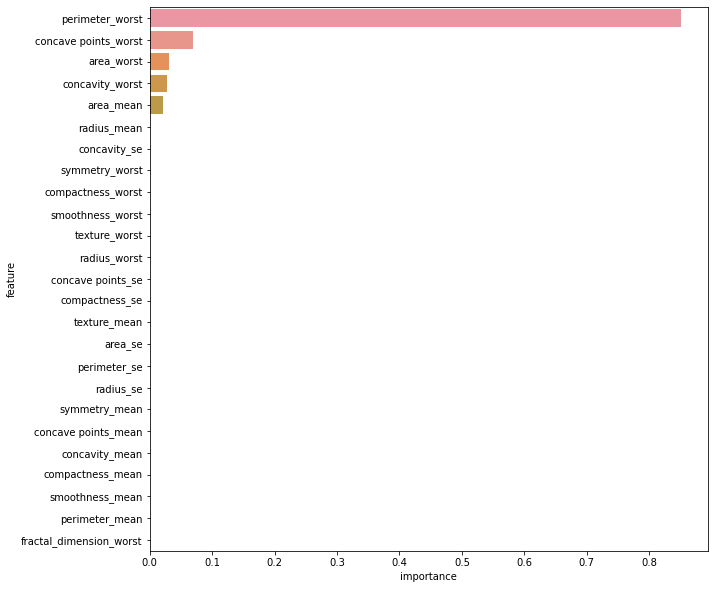

In [120]:
plt.figure(figsize=(10, 10))
sns.barplot(y='feature', x='importance', data=df)
plt.show()


### 결정트리모델 - 회귀

In [104]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.5099206349206349

### 랜덤포레스트(앙상블기법) 설명 

In [105]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(val_train, val_test)



0.945054945054945

In [106]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9649122807017544
